## Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

data_csv = 'data/scraped_data.csv'


### Cleaning up table data

In [15]:
df = pd.read_csv(data_csv)
raw_df = df # in case this is needed for lookups

# ToDo: Maybe convert into methods to tidy up this section

# Remove duplidate rows
df = df.drop_duplicates()

# Drop some not very useful columns
df = df.drop('property_id', 1)
df = df.drop('environment', 1)
df = df.drop('page_name', 1)
df = df.drop('platform', 1)
df = df.drop('property_category', 1)
df = df.drop('seller_name', 1) # we have seller_id
df = df.drop('published_date', 1) # removing for now, since timespan is only a week
df = df.drop('facility', 1) # this has been split up into individual fiels
df = df.drop('property_type', 1)  # property_type seems to always be apartment print(df.loc[df['property_type'] != 'apartment'])
df = df.drop('lease_units', 1) # lease_units seems to always be months  print(df.loc[df['lease_units'] != 'months'])
df = df.drop('county', 1) # county seems to always be Dublin   print(df.loc[df['county'] != 'Dublin'])
df = df.drop('currency', 1) # currency seems to always be €   print(df.loc[df['county'] != '€'])
df = df.drop('longitude', 1) # doesn't seem to correlate much with price
df = df.drop('latitude', 1) # doesn't seem to correlate much with price


#show missing values in each column
print(df.isnull().sum())

# Replace area names with numbers
areas = set(df['area'])
areas_dict = {x:float(i) for i,x in enumerate(areas)}
df['area'] = df['area'].map(areas_dict)

# Replace 'seller_type' values with numbers
df['seller_type'] = df['seller_type'].map({'agent': 1.0, 'private': 0.0})

# Replace 'furnished' values with numbers
df['furnished'] = df['furnished'].map({'yes': 1.0, 'no': 0.0, 'either': 3.0})

# Replace 'open_viewing' values with numbers
df['open_viewing'] = df['open_viewing'].map({'yes': 1.0, 'no': 0.0})

# Convert int values to floats
df['no_of_photos'] = df['no_of_photos'].astype(float)
df['available_for'] = df['available_for'].astype(float)
df['price'] = df['price'].astype(float)
df['beds'] = df['beds'].astype(float)
df['bathrooms'] = df['bathrooms'].astype(float)

# Replace True values with 1, False and NaN with 0
df = df.replace({True:1.0}).replace({False:0.0}).fillna(0.0)

# ToDo: available_from might be interesting after calculating timespan from ad date to available date?

print(df.info())
df.head()

property_title                0
seller_id                   250
seller_type                   0
open_viewing                  0
no_of_photos                  0
available_from                0
available_for                 0
area                          0
furnished                     0
bathrooms                     0
beds                          0
price_frequency               0
price                         0
Parking                     276
Cable Television            300
Dryer                       377
Garden / Patio / Balcony    366
Washing Machine             116
Serviced Property           660
Pets Allowed                830
Wheelchair Access           759
Central Heating             172
Microwave                   178
Smoking                     836
Dishwasher                  352
House Alarm                 645
Internet                    358
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 0 to 858
Data columns (total 27 columns):
property_title    

,property_title,seller_id,seller_type,open_viewing,no_of_photos,available_from,available_for,area,furnished,bathrooms,...,Washing Machine,Serviced Property,Pets Allowed,Wheelchair Access,Central Heating,Microwave,Smoking,Dishwasher,House Alarm,Internet
0,"1 BED, Tallaght Cross West, Tallaght, Dublin 24",9871.0,1.0,0.0,3.0,2017-10-01,12.0,100.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,"1 Palace Street, Dublin 2, Dublin 2",7549.0,1.0,0.0,6.0,2017-09-15,12.0,103.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,"10 Clarinda House, Clarinda Park West, Dun Lao...",0.0,0.0,0.0,8.0,2017-09-18,6.0,93.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,"109 Geraldstown Wood, Santry, Dublin 9",11.0,1.0,0.0,6.0,2017-09-13,12.0,54.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,"110 Old Distillery, Anne Street North, Dublin ...",181.0,1.0,0.0,11.0,2017-09-17,12.0,53.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [3]:
print ("Dimension of train data {}".format(df.shape))

Dimension of train data (848, 27)


In [4]:
df.describe()

,seller_id,seller_type,open_viewing,no_of_photos,available_for,area,furnished,bathrooms,beds,price,...,Washing Machine,Serviced Property,Pets Allowed,Wheelchair Access,Central Heating,Microwave,Smoking,Dishwasher,House Alarm,Internet
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,...,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,3779.438679,0.705189,0.009434,11.154481,8.862028,62.232311,1.055425,1.504717,1.857311,2201.288915,...,0.863208,0.221698,0.021226,0.104953,0.797170,0.790094,0.014151,0.584906,0.239387,0.577830
std,4110.803713,0.456227,0.096726,7.574016,5.283560,30.617903,0.458933,0.707508,1.697882,917.375144,...,0.343831,0.415634,0.144223,0.306674,0.402344,0.407481,0.118183,0.493029,0.426961,0.494197
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,6.000000,3.000000,39.750000,1.000000,1.000000,1.000000,1500.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1206.000000,1.000000,0.000000,9.000000,12.000000,62.000000,1.000000,1.000000,2.000000,1900.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,8038.000000,1.000000,0.000000,14.000000,12.000000,89.000000,1.000000,2.000000,2.000000,2800.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,10895.000000,1.000000,1.000000,58.000000,36.000000,108.000000,3.000000,12.000000,47.000000,7000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
print(df.columns.values)

['property_title' 'seller_id' 'seller_type' 'open_viewing' 'no_of_photos'
 'available_from' 'available_for' 'area' 'furnished' 'bathrooms' 'beds'
 'price_frequency' 'price' 'Parking' 'Cable Television' 'Dryer'
 'Garden / Patio / Balcony' 'Washing Machine' 'Serviced Property'
 'Pets Allowed' 'Wheelchair Access' 'Central Heating' 'Microwave' 'Smoking'
 'Dishwasher' 'House Alarm' 'Internet']


### Splitting into Weekly and Monthly Priced Dataframes

In [17]:
df_weekly_rates = df.loc[df['price_frequency'] == 'weekly']
df_weekly_rates = df_weekly_rates.drop('price_frequency', 1)
print(df_weekly_rates.shape)

df_monthly_rates = df.loc[df['price_frequency'] == 'monthly']
df_monthly_rates = df_monthly_rates.drop('price_frequency', 1)

# There seems to be an ad with 47 beds for 750/months. removing this
df_monthly_rates = df_monthly_rates[df_monthly_rates.beds < 20]
print(df_monthly_rates.shape)

(157, 26)
(690, 26)


## Continuing with only monthly priced data for now

#### Price per area scatterplot

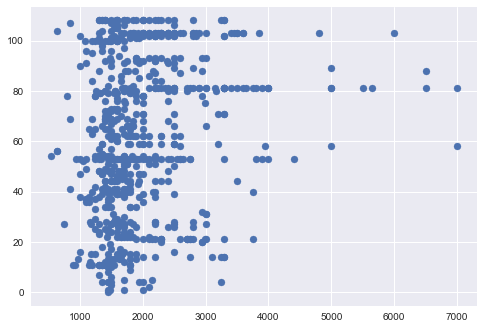

In [18]:
x = df_monthly_rates['price']
y = df_monthly_rates['area']
plt.scatter(x, y)
plt.show()

Going to remove the > 6000/month outliers

In [19]:
df_monthly_rates = df_monthly_rates[df_monthly_rates.price < 6000]

#### Histograms

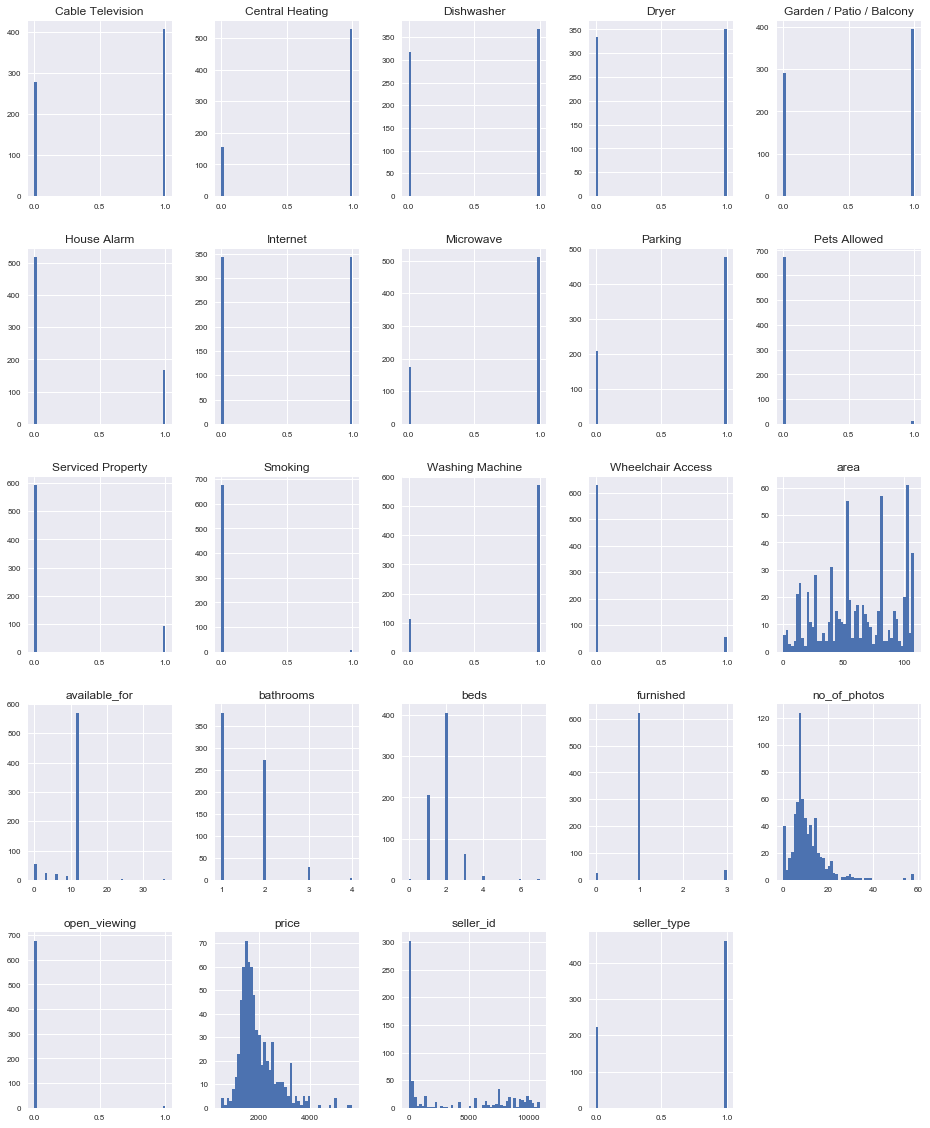

In [20]:
df_monthly_rates.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

#### Correlations

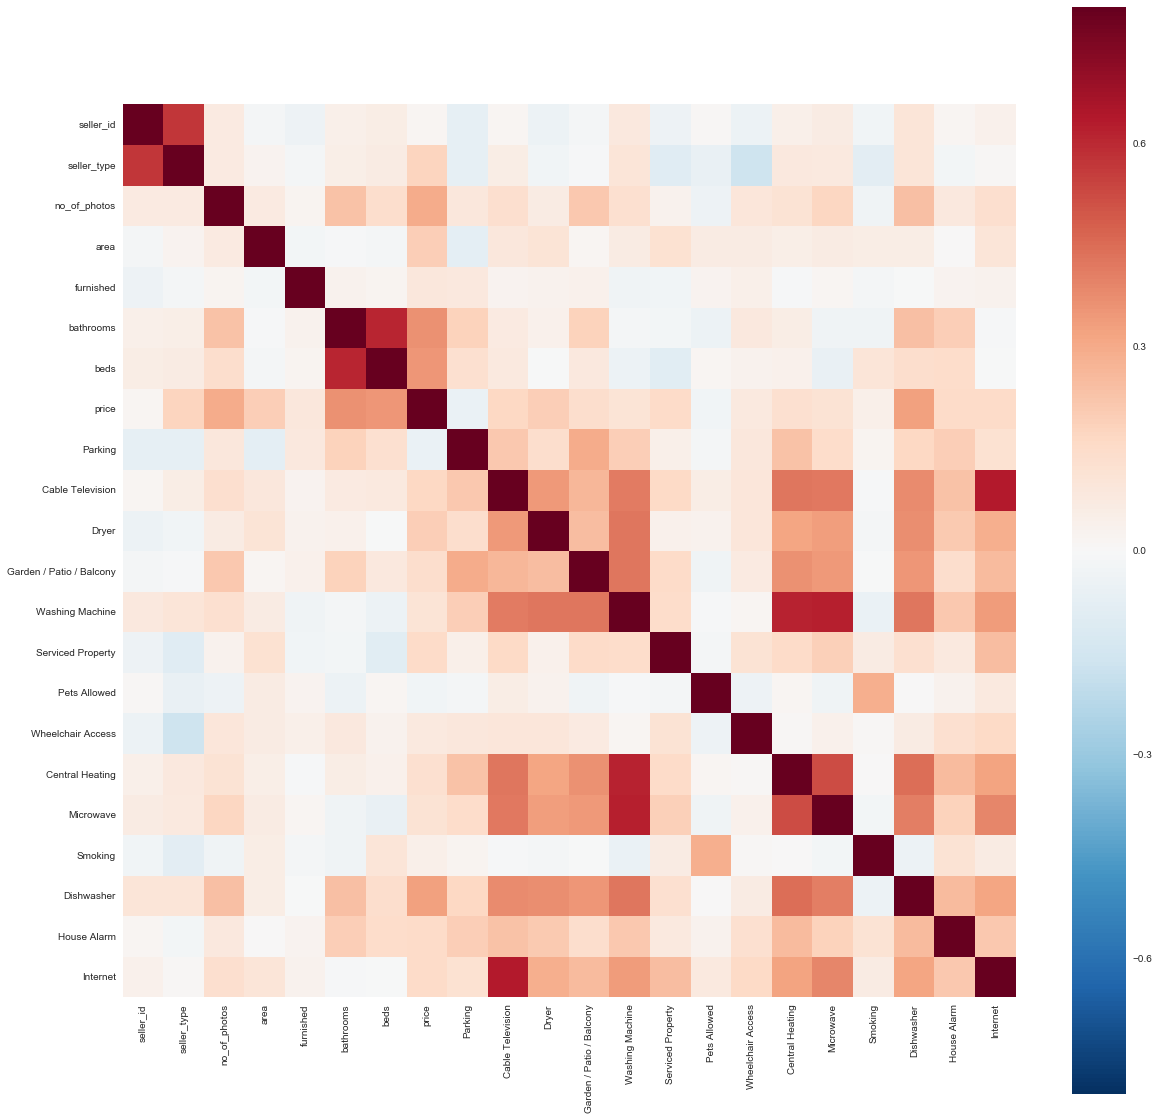

In [21]:
#correlation matrix
corrmat = df_monthly_rates.drop('available_for', 1).drop('open_viewing', 1).corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True);

# plt.figure(figsize=(10,10))
# foo = sns.heatmap(corrmat.corr(), vmax=0.8, square=True, annot=True)

Features that correlate most with the monthly rent price are number of no_of_photos, beds and bathrooms, as well as 'dishwasher'...

In [22]:
df_monthly_rates['price'].describe()

count     685.000000
mean     1954.448175
std       720.989427
min       550.000000
25%      1500.000000
50%      1750.000000
75%      2290.000000
max      5650.000000
Name: price, dtype: float64

In [23]:
expensives = df_monthly_rates.loc[df_monthly_rates['price'] > 6000]
print(expensives['price'])
print(expensives['property_title'])

Series([], Name: price, dtype: float64)
Series([], Name: property_title, dtype: object)


#### Show price distibution for number of bathrooms

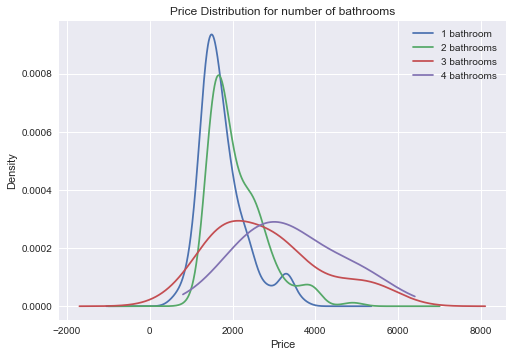

In [24]:
df_monthly_rates.price[(df_monthly_rates.bathrooms == 1.0)].plot(kind='kde', label='1 bathroom')    
df_monthly_rates.price[(df_monthly_rates.bathrooms == 2.0)].plot(kind='kde', label='2 bathrooms')      
df_monthly_rates.price[(df_monthly_rates.bathrooms == 3.0)].plot(kind='kde', label='3 bathrooms')      
df_monthly_rates.price[(df_monthly_rates.bathrooms == 4.0)].plot(kind='kde', label='4 bathrooms')    

plt.xlabel("Price")    
plt.title("Price Distribution for number of bathrooms")

plt.legend()

#### Price Distribution per area

In [64]:
print(areas_dict)
grouped = df_monthly_rates.groupby('area').area.count()
grouped.sort_values(ascending=False)


{'Ard Na Greine': 0.0, "Harold's Cross": 1.0, 'Porterstown': 2.0, 'Kilternan': 3.0, 'Rathgar': 4.0, 'Raheny': 5.0, 'Navan Road (D7)': 6.0, 'Ward': 7.0, 'Royal Canal Park': 8.0, 'Churchtown': 9.0, 'Park West': 10.0, 'Clondalkin': 11.0, 'Beaumont': 12.0, 'Lucan': 13.0, 'Ringsend': 14.0, 'Ashtown': 15.0, 'Sutton': 16.0, 'Killester': 17.0, 'Skerries': 18.0, 'Merrion': 19.0, 'Temple Bar': 20.0, 'Grand Canal Dock': 21.0, 'Castleknock': 22.0, 'Ballybough': 23.0, 'Rathcoole': 24.0, 'Cherry Orchard': 25.0, 'Milltown': 26.0, 'Rathmines': 27.0, 'Malahide': 28.0, 'Drimnagh': 29.0, 'Rathmichael': 30.0, 'Killiney': 31.0, 'Dartry': 32.0, 'Arbour Hill': 33.0, 'Swords': 34.0, 'North Circular Road': 35.0, 'Cabra': 36.0, 'Balbriggan': 37.0, 'Phibsborough': 38.0, 'Rathfarnham': 39.0, 'Dundrum': 40.0, 'Finglas': 41.0, 'Portmarnock': 42.0, 'Booterstown': 43.0, 'Smithfield': 44.0, 'Perrystown': 45.0, 'Fairview': 46.0, 'Dublin 7': 47.0, 'Inchicore': 48.0, 'Tyrrelstown': 49.0, 'Ranelagh': 50.0, 'Ballinteer': 5

area
53.0     54
103.0    44
81.0     42
108.0    30
21.0     19
102.0    17
11.0     17
62.0     16
54.0     15
44.0     14
41.0     13
80.0     13
59.0     13
100.0    12
27.0     12
39.0     10
28.0     10
15.0     10
92.0     10
93.0     10
66.0      9
22.0      9
48.0      9
47.0      9
69.0      8
13.0      8
40.0      8
78.0      8
101.0     8
65.0      8
         ..
56.0      2
57.0      2
42.0      2
49.0      2
107.0     2
55.0      2
5.0       2
2.0       1
95.0      1
8.0       1
9.0       1
97.0      1
3.0       1
99.0      1
7.0       1
6.0       1
98.0      1
45.0      1
94.0      1
18.0      1
19.0      1
77.0      1
67.0      1
64.0      1
61.0      1
30.0      1
32.0      1
33.0      1
52.0      1
0.0       1
Name: area, dtype: int64

There is a lot of area noise, i.e. 'area' values that only occur in a handful of adds. 
Maybe these need to be consolidated/grouped together with other areas? 
Maybe group by post code only?

#### Showing price distribution for the most common areas

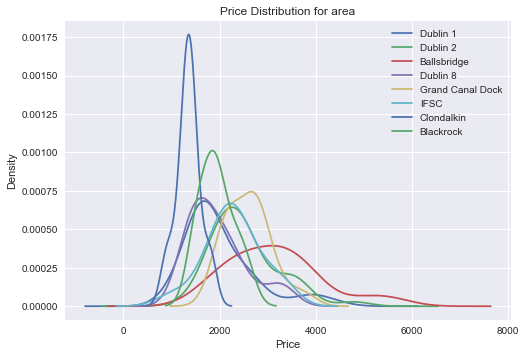

In [65]:
df_monthly_rates.price[(df_monthly_rates.area == 53.0)].plot(kind='kde', label='Dublin 1')   
df_monthly_rates.price[(df_monthly_rates.area == 103.0)].plot(kind='kde', label='Dublin 2')  
df_monthly_rates.price[(df_monthly_rates.area == 81.0)].plot(kind='kde', label='Ballsbridge')   
df_monthly_rates.price[(df_monthly_rates.area == 108.0)].plot(kind='kde', label='Dublin 8')  
df_monthly_rates.price[(df_monthly_rates.area == 21.0)].plot(kind='kde', label='Grand Canal Dock')
df_monthly_rates.price[(df_monthly_rates.area == 102.0)].plot(kind='kde', label='IFSC')
df_monthly_rates.price[(df_monthly_rates.area == 11.0)].plot(kind='kde', label='Clondalkin')      
df_monthly_rates.price[(df_monthly_rates.area == 62.0)].plot(kind='kde', label='Blackrock')


plt.xlabel("Price")    
plt.title("Price Distribution for area")

plt.legend()